In [8]:
import pandas as pd
from fbprophet import Prophet
import datetime

In [12]:
df = pd.read_excel("C:\\Users\\maxim.chernyshov\\Desktop\\Пророк.xlsx")

In [13]:
df['ds'] = pd.to_datetime(df['ds'])

In [14]:
df

,ds,y
0,2015-01-31,1.432834e+09
1,2015-02-01,1.450325e+09
2,2015-03-31,1.650594e+09
3,2015-04-30,1.755881e+09
4,2015-05-31,2.099389e+09
5,2015-06-30,2.811059e+09
6,2015-07-31,3.804768e+09
7,2015-08-31,4.389266e+09
8,2015-09-30,4.451720e+09
9,2015-10-31,4.676617e+09


In [15]:
def append_df_to_excel(filename, df, sheet_name='Sheet1', startcol=None,
                       truncate_sheet=False, 
                       **to_excel_kwargs):
    """
    Append a DataFrame [df] to existing Excel file [filename]
    into [sheet_name] Sheet.
    If [filename] doesn't exist, then this function will create it.

    Parameters:
      filename : File path or existing ExcelWriter
                 (Example: '/path/to/file.xlsx')
      df : dataframe to save to workbook
      sheet_name : Name of sheet which will contain DataFrame.
                   (default: 'Sheet1')
      startrow : upper left cell row to dump data frame.
                 Per default (startrow=None) calculate the last row
                 in the existing DF and write to the next row...
      truncate_sheet : truncate (remove and recreate) [sheet_name]
                       before writing DataFrame to Excel file
      to_excel_kwargs : arguments which will be passed to `DataFrame.to_excel()`
                        [can be dictionary]

    Returns: None
    """
    from openpyxl import load_workbook

    # ignore [engine] parameter if it was passed
    if 'engine' in to_excel_kwargs:
        to_excel_kwargs.pop('engine')

    writer = pd.ExcelWriter(filename, engine='openpyxl')

    try:
        # try to open an existing workbook
        writer.book = load_workbook(filename)

        # get the last row in the existing Excel sheet
        # if it was not specified explicitly
        if startcol is None and sheet_name in writer.book.sheetnames:
            startcol = writer.book[sheet_name].max_column

        # truncate sheet
        if truncate_sheet and sheet_name in writer.book.sheetnames:
            # index of [sheet_name] sheet
            idx = writer.book.sheetnames.index(sheet_name)
            # remove [sheet_name]
            writer.book.remove(writer.book.worksheets[idx])
            # create an empty sheet [sheet_name] using old index
            writer.book.create_sheet(sheet_name, idx)

        # copy existing sheets
        writer.sheets = {ws.title:ws for ws in writer.book.worksheets}
    except FileNotFoundError:
        # file does not exist yet, we will create it
        pass

    if startcol is None:
        startcol = 0

    # write out the new sheet
    df.to_excel(writer, sheet_name, startcol=startcol, **to_excel_kwargs)

    # save the workbook
    writer.save()

In [16]:
m = Prophet()
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\maxim.chernyshov\AppData\Local\Continuum\anaaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [17]:
future = m.make_future_dataframe(periods=12,freq='M')

In [18]:
forecast = m.predict(future)

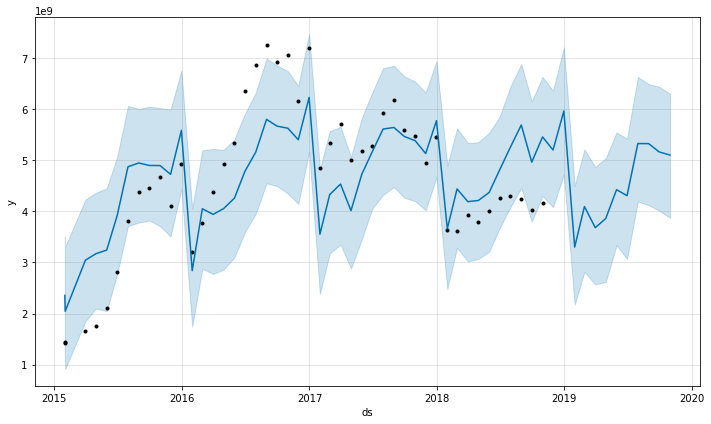

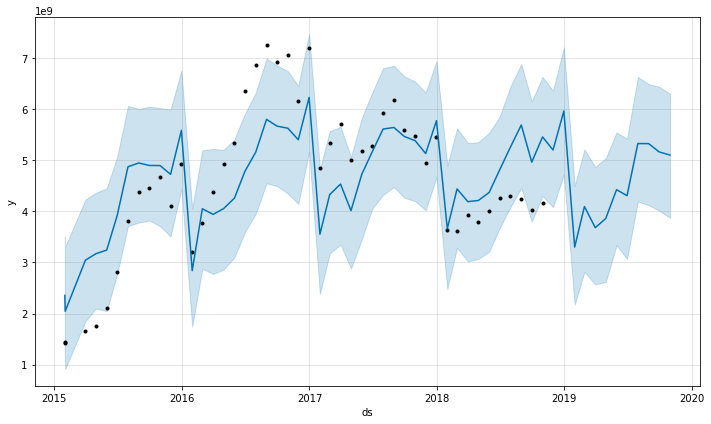

In [19]:
m.plot(forecast)

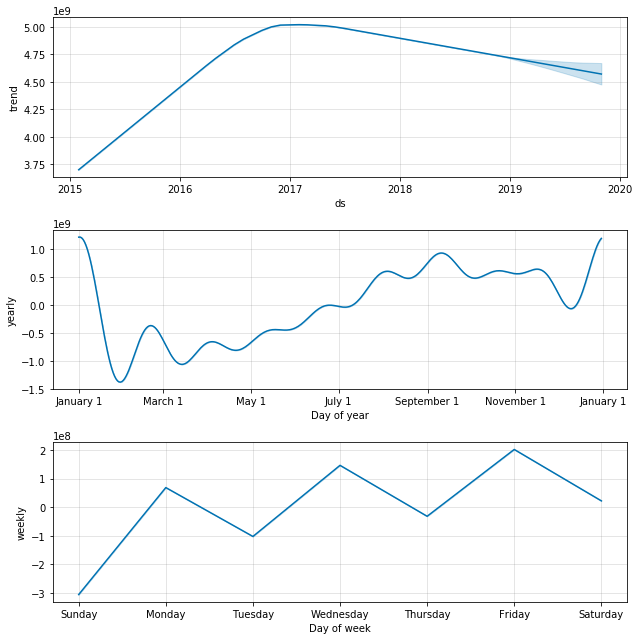

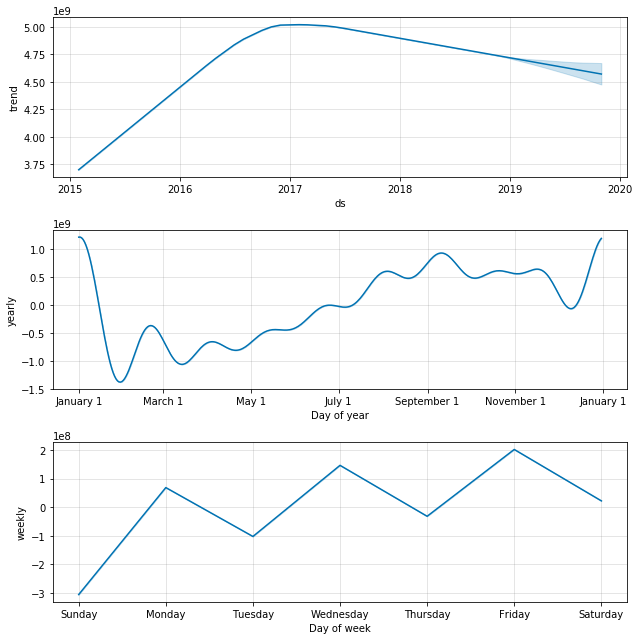

In [20]:
m.plot_components(forecast)

In [21]:
 f1=forecast[['yhat']]
    
    
filename = 'C:\\Users\\maxim.chernyshov\\Desktop\\Пророк_2.xlsx'
append_df_to_excel(filename, f1 , sheet_name='aa')